## Import Libraries

In [1]:
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

%matplotlib inline

## Load the Data

In [2]:
df = pd.read_csv("clean7")

In [3]:
df.shape

(8588, 22)

In [4]:
df.head(2)
df.columns

Index(['Unnamed: 0', 'team', 'name', 'position', 'height', 'age', 'appearance',
       'goals', 'assists', 'yellow cards', 'second yellow cards', 'red cards',
       'goals conceded', 'clean sheets', 'minutes played', 'days_injured',
       'games_injured', 'award', 'current_value', 'highest_value',
       'position_encoded', 'winger'],
      dtype='object')

In [5]:
df = df.drop('Unnamed: 0', axis=1)
df = df.drop('name', axis=1)

df

,team,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,Manchester United,Defender Centre-Back,194.000000,30.0,68,0.037799,0.000000,0.302394,0.0189,0.000000,0.0,0.0,4762,148,27,1,25000000,70000000,2,0
1,Manchester United,Defender Centre-Back,187.000000,28.0,70,0.000000,0.032901,0.115153,0.0000,0.000000,0.0,0.0,5471,95,19,10,15000000,35000000,2,0
2,Manchester United,Defender Centre-Back,186.000000,21.0,34,0.000000,0.000000,0.130529,0.0000,0.000000,0.0,0.0,2758,47,13,0,2000000,2000000,2,0
3,Manchester United,Defender Left-Back,169.000000,23.0,89,0.012619,0.063096,0.227145,0.0000,0.000000,0.0,0.0,7132,182,15,3,22000000,22000000,2,1
4,Manchester United,Defender Left-Back,180.000000,22.0,34,0.000000,0.033507,0.335071,0.0000,0.000000,0.0,0.0,2686,175,28,1,10000000,12000000,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8583,Western Sydney Wanderers,Attack-RightWinger,181.240353,20.0,16,0.175953,0.087977,0.263930,0.0000,0.000000,0.0,0.0,1023,0,0,0,75000,75000,4,1
8584,Western Sydney Wanderers,Attack Centre-Forward,190.000000,24.0,26,0.372671,0.186335,0.186335,0.0000,0.000000,0.0,0.0,1449,102,18,0,300000,300000,4,0
8585,Western Sydney Wanderers,Attack Centre-Forward,181.240353,19.0,20,0.375000,0.000000,0.187500,0.0000,0.000000,0.0,0.0,960,0,0,0,50000,50000,4,0
8586,Western Sydney Wanderers,Attack Centre-Forward,181.240353,20.0,17,0.312139,0.104046,0.000000,0.0000,0.104046,0.0,0.0,865,0,0,0,50000,50000,4,0


In [6]:
df

,team,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,Manchester United,Defender Centre-Back,194.000000,30.0,68,0.037799,0.000000,0.302394,0.0189,0.000000,0.0,0.0,4762,148,27,1,25000000,70000000,2,0
1,Manchester United,Defender Centre-Back,187.000000,28.0,70,0.000000,0.032901,0.115153,0.0000,0.000000,0.0,0.0,5471,95,19,10,15000000,35000000,2,0
2,Manchester United,Defender Centre-Back,186.000000,21.0,34,0.000000,0.000000,0.130529,0.0000,0.000000,0.0,0.0,2758,47,13,0,2000000,2000000,2,0
3,Manchester United,Defender Left-Back,169.000000,23.0,89,0.012619,0.063096,0.227145,0.0000,0.000000,0.0,0.0,7132,182,15,3,22000000,22000000,2,1
4,Manchester United,Defender Left-Back,180.000000,22.0,34,0.000000,0.033507,0.335071,0.0000,0.000000,0.0,0.0,2686,175,28,1,10000000,12000000,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8583,Western Sydney Wanderers,Attack-RightWinger,181.240353,20.0,16,0.175953,0.087977,0.263930,0.0000,0.000000,0.0,0.0,1023,0,0,0,75000,75000,4,1
8584,Western Sydney Wanderers,Attack Centre-Forward,190.000000,24.0,26,0.372671,0.186335,0.186335,0.0000,0.000000,0.0,0.0,1449,102,18,0,300000,300000,4,0
8585,Western Sydney Wanderers,Attack Centre-Forward,181.240353,19.0,20,0.375000,0.000000,0.187500,0.0000,0.000000,0.0,0.0,960,0,0,0,50000,50000,4,0
8586,Western Sydney Wanderers,Attack Centre-Forward,181.240353,20.0,17,0.312139,0.104046,0.000000,0.0000,0.104046,0.0,0.0,865,0,0,0,50000,50000,4,0


## Preprocess the Data

#### 1. Simple EDA + Data Quality checking

In [7]:
# uniqeness
df.drop_duplicates(inplace=True)
df[df.duplicated()]

,team,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger


In [8]:
# Completeness
df.isnull().sum()

team                   0
position               0
height                 0
age                    0
appearance             0
goals                  0
assists                0
yellow cards           0
second yellow cards    0
red cards              0
goals conceded         0
clean sheets           0
minutes played         0
days_injured           0
games_injured          0
award                  0
current_value          0
highest_value          0
position_encoded       0
winger                 0
dtype: int64

In [9]:
# Accurecy types
df.dtypes

team                    object
position                object
height                 float64
age                    float64
appearance               int64
goals                  float64
assists                float64
yellow cards           float64
second yellow cards    float64
red cards              float64
goals conceded         float64
clean sheets           float64
minutes played           int64
days_injured             int64
games_injured            int64
award                    int64
current_value            int64
highest_value            int64
position_encoded         int64
winger                   int64
dtype: object

In [10]:
# 'team', 'name', 'position', 'height', 'age', 'appearance', 'goals',
#        'assists', 'yellow cards', 'second yellow cards', 'red cards',
#        'goals conceded', 'clean sheets', 'minutes played', 'days_injured',
#        'games_injured', 'award', 'current_value', 'highest_value',
#        'position_encoded', 'winger']


categorical_features = ['team', 'position', 'position_encoded', 'winger']
numeric_features = ['height', 'age', 'appearance','goals','assists','yellow cards','second yellow cards','red cards','goals conceded','clean sheets', 'minutes played', 'days_injured', 
                    'games_injured', 'award', 'highest_value']

#### 2. Feature engineering

1. Feature scaling
2. Aggregation
3. One hot coding

In [11]:
df.head(2)

,team,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,Manchester United,Defender Centre-Back,194.0,30.0,68,0.037799,0.000000,0.302394,0.0189,0.0,0.0,0.0,4762,148,27,1,25000000,70000000,2,0
1,Manchester United,Defender Centre-Back,187.0,28.0,70,0.000000,0.032901,0.115153,0.0000,0.0,0.0,0.0,5471,95,19,10,15000000,35000000,2,0


In [12]:
categorical_features

['team', 'position', 'position_encoded', 'winger']

In [13]:
# one hot coding
df = pd.get_dummies(df, columns=categorical_features)

In [14]:
df.shape

(8588, 412)

In [15]:
df.head(2)

,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,...,position_midfield-CentralMidfield,position_midfield-DefensiveMidfield,position_midfield-LeftMidfield,position_midfield-RightMidfield,position_encoded_1,position_encoded_2,position_encoded_3,position_encoded_4,winger_0,winger_1
0,194.0,30.0,68,0.037799,0.000000,0.302394,0.0189,0.0,0.0,0.0,...,False,False,False,False,False,True,False,False,True,False
1,187.0,28.0,70,0.000000,0.032901,0.115153,0.0000,0.0,0.0,0.0,...,False,False,False,False,False,True,False,False,True,False


#### 3. Feature selection

In [17]:
# sns.heatmap(df.corr(), annot=True);

In [18]:
correlation = df.corr()
print(correlation['current_value'].sort_values(ascending=False))

current_value          1.000000
highest_value          0.822884
appearance             0.451659
minutes played         0.445840
award                  0.239606
                         ...   
position_midfield     -0.045019
age                   -0.050690
position_encoded_1    -0.072709
position_Goalkeeper   -0.072709
goals conceded              NaN
Name: current_value, Length: 412, dtype: float64


In [31]:
# ['team', 'position', 'height', 'age', 'appearance', 'goals',
#        'assists', 'yellow cards', 'second yellow cards', 'red cards',
#        'goals conceded', 'clean sheets', 'minutes played', 'days_injured',
#        'games_injured', 'award', 'current_value', 'highest_value',
#        'position_encoded', 'winger']

# Set the correlation threshold
threshold = 0.2  # You can change this value based on your requirement

# Filter the correlations
# We use `abs()` for absolute value to consider both strong positive and negative correlations
selected_features = correlation[abs(correlation['current_value']) > threshold]['current_value'].index
selected_features

Index(['appearance', 'minutes played', 'games_injured', 'award',
       'current_value', 'highest_value'],
      dtype='object')

In [49]:


selected_features =['appearance', 'minutes played', 'games_injured', 'award',
       'current_value', 'highest_value']

In [50]:
df = df[selected_features]
df.head()

,appearance,minutes played,games_injured,award,current_value,highest_value
0,68,4762,27,1,25000000,70000000
1,70,5471,19,10,15000000,35000000
2,34,2758,13,0,2000000,2000000
3,89,7132,15,3,22000000,22000000
4,34,2686,28,1,10000000,12000000


#### 4. Prepare train and test data

In [51]:
# Prepare data
X = df.drop(['current_value'], axis=1)
y = df['current_value']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    shuffle=True,
                                                    random_state=42)

# sacle the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [52]:
X.shape

(8588, 5)

## Buliding the Model

In [53]:
model = LinearRegression()

In [54]:
ridge_model = Ridge()  # You can adjust alpha to see different resu

In [55]:
lasso_model = Lasso()  # You can adjust alpha to see different results

In [56]:
param_grid = {
    'alpha': [0, 0.0000003, 0.0002, 0.001, 0.01, 0.5, 1, 5]  # Regularization strength
}
grid_search = GridSearchCV(estimator=ridge_model,
                           param_grid=param_grid,
                           cv=5,
                           scoring='neg_mean_squared_error', 
                           verbose=1)

grid_search_lasso = GridSearchCV(estimator=lasso_model,
                           param_grid=param_grid,
                           cv=5,
                           scoring='neg_mean_squared_error', 
                           verbose=1)

## Train the Model

In [57]:
# Fit the model on the training data
model.fit(X_train_scaled, y_train)

LinearRegression()

## Test the Model

In [58]:
# Predict and evaluate the model
y_pred = model.predict(X_test_scaled)

## Interpretation of the Model

In [59]:
coeff_df = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
appearance,-2.133515e+05
minutes played,9.329103e+05
games_injured,-3.817795e+05
award,-6.046624e+05
highest_value,4.559553e+06


In [60]:
print(model.intercept_) 

2880671.033478894


In [61]:
lasso_model = Lasso(alpha=1.0)  # Initialize the Lasso model with a specific alpha
lasso_model.fit(X, y)
coeff_df = pd.DataFrame(lasso_model.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
appearance,-14688.939088
minutes played,578.025110
games_injured,-26874.128959
award,-242399.853609
highest_value,0.552257


## Evaluating the Model 

1. Mean Square Error

In [ ]:
y_base = [y_train.mean()] * len(y_test)

In [ ]:
# our benchmark model
mse_base = mean_squared_error(y_test, y_base )
print(f'Mean Squared Error of base model: {mse_base}')

Mean Squared Error of base model: 3525053139.6218147


In [ ]:
mse_train = mean_squared_error(y_train, model.predict(X_train_scaled))
mse_test = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error for training: {mse_train}')
print(f'Mean Squared Error for testing: {mse_test}')

Mean Squared Error for training: 1291203369.7082233
Mean Squared Error for testing: 1291014311.7357974


2. Mean Absolute Error

In [ ]:
# our benchmark model
mse_base = mean_absolute_error(y_test, y_base )
print(f'Mean Absolute  Error of base model: {mse_base}')

Mean Absolute  Error of base model: 42200.97317509818


In [ ]:
mae_train = mean_absolute_error(y_train, model.predict(X_train_scaled))
mae_test = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error for training: {mae_train}')
print(f'Mean Absolute Error for testing: {mae_test}')

Mean Absolute Error for training: 24397.66499302171
Mean Absolute Error for testing: 25186.715154450434


3. Root Mean Squared Error

In [ ]:
# our benchmark model
print(f'Root Mean Squared  Error of base model: {np.sqrt(mse_base)}')

Root Mean Squared  Error of base model: 59372.157949848974


In [ ]:
print(f'Root Mean Squared Error for training: {np.sqrt(mse_train)}')
print(f'Root Mean Squared Error for testing: {np.sqrt(mse_test)}')

Root Mean Squared Error for training: 35933.31837874458
Root Mean Squared Error for testing: 35930.687604550476


4. R Square

In [ ]:
r2_score_train = r2_score(y_train, model.predict(X_train_scaled))
r2_score_test = r2_score(y_test, y_pred)
print(f'R Square for training: {r2_score_train}')
print(f'R Square for testing: {r2_score_test}')

R Square for training: 0.597025797763749
R Square for testing: 0.6333064542453376


#### Predictions vs. Real Values

In [ ]:
predictions = model.predict(X_test_scaled)
#predictions

In [ ]:
Real_Values = np.array(y_test)
#Real_Values

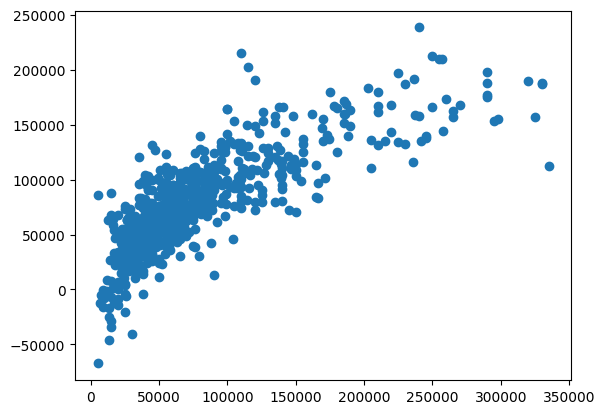

In [ ]:
plt.scatter(Real_Values,predictions); 

#### Residual Histogram

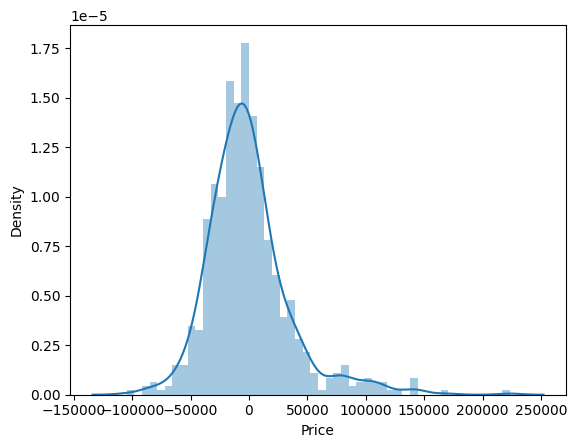

In [ ]:
sns.distplot((y_test-predictions),bins=50); # it's good if we get normal distribution